# This project is based on a dataset of Medical Cost Personal Datasets from a insurance forecast

The file can be find in kaggle https://www.kaggle.com/datasets/mirichoi0218/insurance

The original project uses Linear Regression but for this project I will be using neural regression

In [1]:
# Importing the required libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("/Users/willianribeiro/Documents/GitHub/tensorflow-experiments/data/insurance.csv")
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# Seeing the first lines of the dataset
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Since we have to type of variables at our data source for the model, we need to transform all them into numbers (one hot ecoding)

In [4]:
# For pandas dataframe we can use the get dummies

insurance_dummie = pd.get_dummies(insurance, dtype=int) # OBS the get_dummies function had an update, if dtype is not specified it returns a bool instead of a int
insurance_dummie.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
insurance_dummie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int64  
 5   sex_male          1338 non-null   int64  
 6   smoker_no         1338 non-null   int64  
 7   smoker_yes        1338 non-null   int64  
 8   region_northeast  1338 non-null   int64  
 9   region_northwest  1338 non-null   int64  
 10  region_southeast  1338 non-null   int64  
 11  region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [6]:
# Creating the X and Y values

x = insurance_dummie.drop("charges", axis=1)
y = insurance_dummie[["charges"]]

x.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
        charges
 0  16884.92400
 1   1725.55230
 2   4449.46200
 3  21984.47061
 4   3866.8

Let's create a training and a test part from our dataset

In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [8]:
# Buildin a neural network
tf.random.set_seed(42)

# 1. Creating a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100


2024-04-21 11:10:20.455623: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-04-21 11:10:20.455645: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-21 11:10:20.455652: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-21 11:10:20.455831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-21 11:10:20.455850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-04-21 11:10:20.720052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 10088.3047 - mae: 10088.3047
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7751.3486 - mae: 7751.3486
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7332.6885 - mae: 7332.6885
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7386.2939 - mae: 7386.2939
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7595.0444 - mae: 7595.0444
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7104.0630 - mae: 7104.0630
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7710.5288 - mae: 7710.5288
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7626.6934 - mae: 7626.6934
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7807.4678 - mae: 7807.4678
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7627.7222 - mae: 7627.7222
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7505.8882 - mae: 7505.8882
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7

In [9]:
insurance_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (536.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [10]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8304.7197 - mae: 8304.7197 


[8289.4296875, 8289.4296875]

In [11]:
y_train.median(), y_train.mean()

(charges    9575.4421
 dtype: float64,
 charges    13346.089736
 dtype: float64)

Since our model is in an average off by 6334 and the mean of our values is 13346 the actual results are pretty much off

For example, we're gonna be charging someone that should be around 9500 dolars by 3200 dolars

In [12]:
# Buildin a neural network
tf.random.set_seed(42)

# 1. Creating a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Adding an aditional layer
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), # Change the optimizer to Adam and increassing the learning rate
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model.fit(x_train, y_train, epochs=300) # Increassing the training time

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 10877.9902 - mae: 10877.9902
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7217.8887 - mae: 7217.8887
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6544.9233 - mae: 6544.9233
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6067.2158 - mae: 6067.2158
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5542.2524 - mae: 5542.2524
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4664.8906 - mae: 4664.8906
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3821.9353 - mae: 3821.9353
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3758.2766 - mae: 3758.2766
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3714.5190 - mae: 3714.5190
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3690.4998 - mae: 3690.4998
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3657.5503 - mae: 3657.5503
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

In [13]:
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1684.8611 - mae: 1684.8611


[1751.4774169921875, 1751.4774169921875]

Text(0.5, 0, 'epochs')

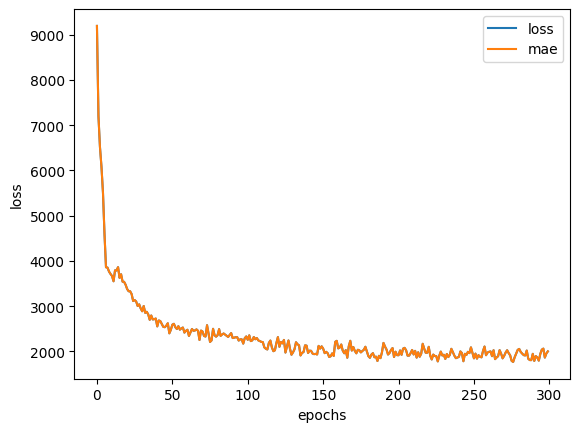

In [14]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🧐 **Question:** How long should you train for?

It depends on the problem.
But tensorflow has a solution [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) which is a TensorFlow component you can add to your model to stop training till it stop improving a certain metric

# Preprocessing data (normalization and standardization)

In terms of scallar values, neural networks prefers normalization.



<Axes: ylabel='Frequency'>

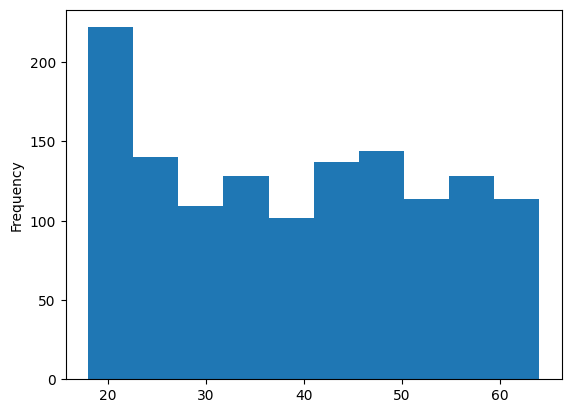

In [16]:
x['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

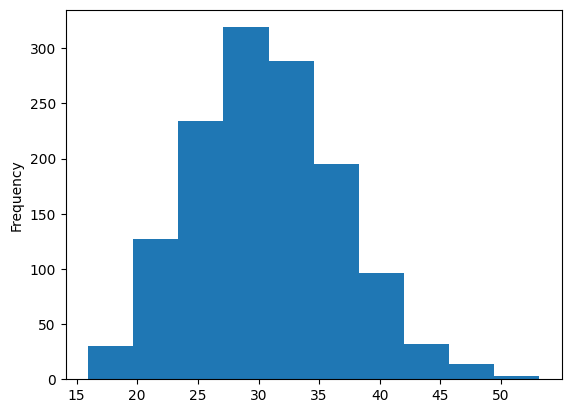

In [18]:
x['bmi'].plot(kind="hist")

<Axes: ylabel='Frequency'>

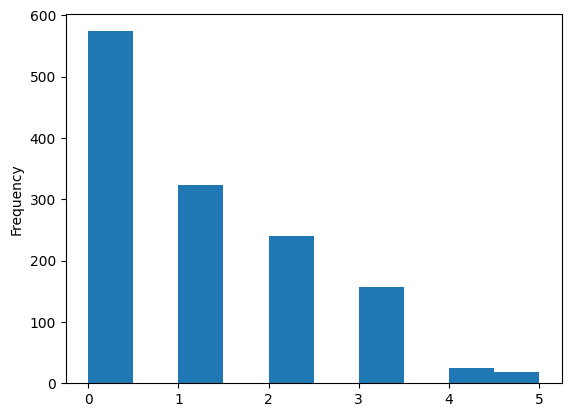

In [19]:
x['children'].plot(kind="hist")

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
# Read the insurance dataframe

insurance = pd.read_csv('/Users/willianribeiro/Documents/GitHub/tensorflow-experiments/data/insurance.csv')

To prepare our data we can borrow a few classes from skitlearn

In [22]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in this columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & Y
X = insurance.drop("charges", axis=1)
Y = insurance[["charges"]]

# Build on train and test splits
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform train and test data with normalization (MinMaxScaler) and OneHotEncoding 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [31]:
# What our data looked like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [25]:
# What does our data looks like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [30]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [32]:
# Buildin a neural network
tf.random.set_seed(42)

# 1. Creating a model
insurance_model_scater = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Adding an aditional layer
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_scater.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), # Change the optimizer to Adam and increassing the learning rate
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_scater.fit(X_train_normal, Y_train, epochs=300) # Increassing the training time

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12834.5361 - mae: 12834.5361
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7821.4526 - mae: 7821.4526
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6172.4722 - mae: 6172.4722
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3765.0293 - mae: 3765.0293
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3680.3054 - mae: 3680.3054
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3688.2412 - mae: 3688.2412
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3690.6594 - mae: 3690.6594
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3689.1187 - mae: 3689.1187
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3687.5452 - mae: 3687.5452
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3664.8865 - mae: 3664.8865
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3672.7129 - mae: 3672.7129
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

In [34]:
insurance_model_scater.evaluate(X_test_normal, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3259.7490 - mae: 3259.7490 


[3206.13671875, 3206.13671875]

Text(0.5, 0, 'epochs')

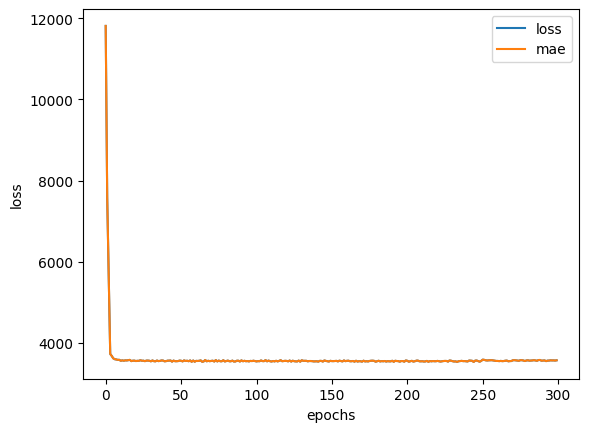

In [35]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")